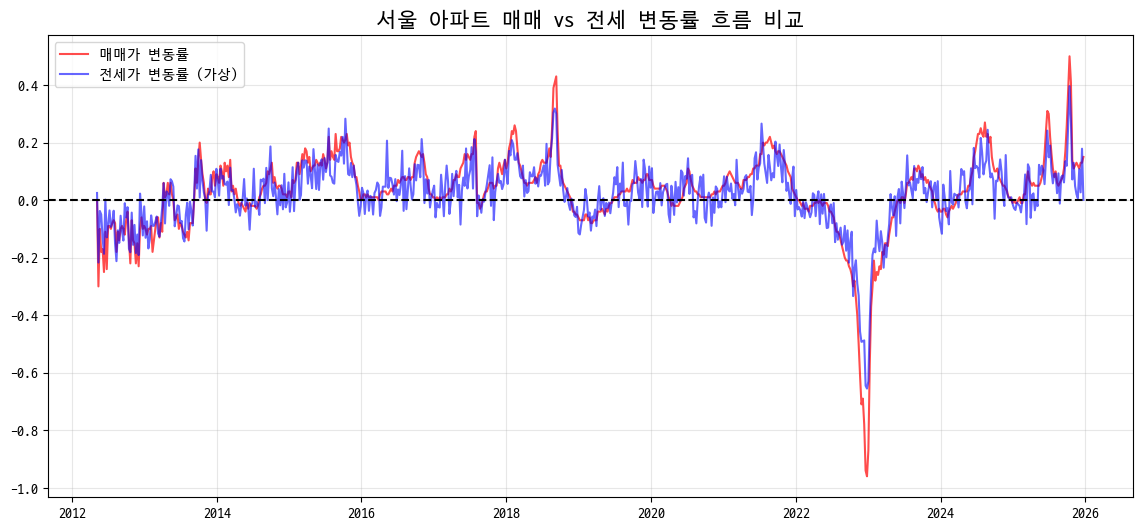

🔢 두 지표의 상관계수: 0.8935


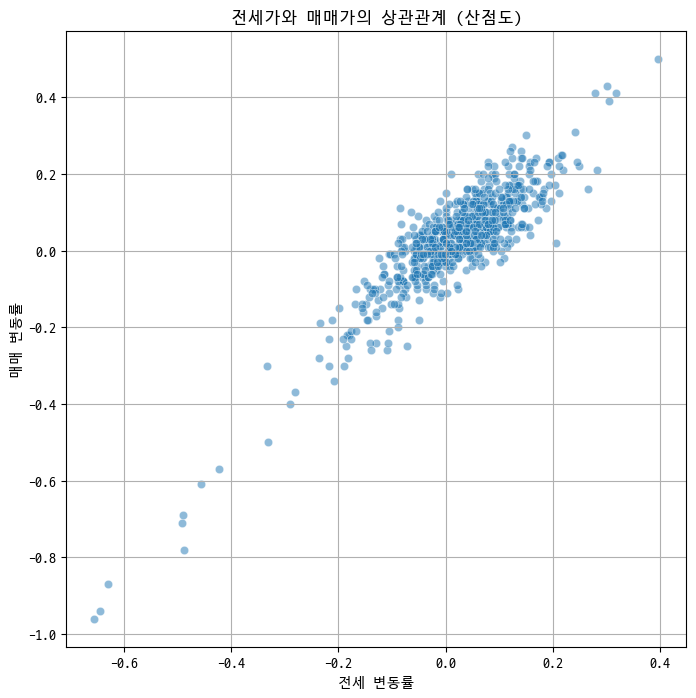

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', family='D2Coding')
plt.rcParams['axes.unicode_minus'] = False

file_path = r"C:\Users\sangh\OneDrive\바탕 화면\AI\Ecommerce-Data-Analysis-Practice\data\seoul_apartment_analysis_final.csv"

df = pd.read_csv(file_path, encoding='cp949')
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 가상의 전세 데이터 만들기 (Simulation)
# 가정: 전세가는 매매가와 70% 정도 연동되며, 약간의 독자적인 움직임(랜덤 노이즈)이 있다.
np.random.seed(42)
noise = np.random.normal(0, 0.05, len(df))
df['Sale_Change'] = df['Seoul_General']
df['Jeonse_Change'] = df['Sale_Change'] * 0.7 + noise

plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Sale_Change'], label='매매가 변동률', color='red', alpha=0.7)
plt.plot(df['Date'], df['Jeonse_Change'], label='전세가 변동률 (가상)', color='blue', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.title("서울 아파트 매매 vs 전세 변동률 흐름 비교", fontsize=15)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

plt.figure(figsize=(8, 8))
sns.scatterplot(x='Jeonse_Change', y='Sale_Change', data=df, alpha=0.5)
plt.title("전세가와 매매가의 상관관계 (산점도)")
plt.xlabel("전세 변동률")
plt.ylabel("매매 변동률")
plt.grid(True)

corr = df[['Sale_Change', 'Jeonse_Change']].corr().iloc[0, 1]
print(f"🔢 두 지표의 상관계수: {corr:.4f}")

In [2]:
from statsmodels.tsa.stattools import grangercausalitytests

data = df[['Sale_Change', 'Jeonse_Change']]

print("🕵️‍♂️ [가설 1] 전세가 변동이 매매가 변동의 원인인가? (Jeonse -> Sale)")
# (주의: Granger 함수는 [타겟, 원인] 순서로 넣어야 합니다!)
test_result = grangercausalitytests(data[['Sale_Change', 'Jeonse_Change']], maxlag=4, verbose=True)

🕵️‍♂️ [가설 1] 전세가 변동이 매매가 변동의 원인인가? (Jeonse -> Sale)

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2720  , p=0.6022  , df_denom=705, df_num=1
ssr based chi2 test:   chi2=0.2732  , p=0.6012  , df=1
likelihood ratio test: chi2=0.2731  , p=0.6012  , df=1
parameter F test:         F=0.2720  , p=0.6022  , df_denom=705, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2131  , p=0.8081  , df_denom=702, df_num=2
ssr based chi2 test:   chi2=0.4292  , p=0.8069  , df=2
likelihood ratio test: chi2=0.4291  , p=0.8069  , df=2
parameter F test:         F=0.2131  , p=0.8081  , df_denom=702, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0886  , p=0.3532  , df_denom=699, df_num=3
ssr based chi2 test:   chi2=3.2985  , p=0.3479  , df=3
likelihood ratio test: chi2=3.2908  , p=0.3489  , df=3
parameter F test:         F=1.0886  , p=0.3532  , df_denom=699, df_num=3

Granger Causality
number of lags (no zero

C:\Users\sangh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
